In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import pymc as pm
import re
from sklearn import linear_model

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import beta, binom
import itertools
from ipywidgets import interact, interactive


import hashlib
%matplotlib inline

sns.set(style="dark")
plt.style.use("ggplot")

import pymc as pm
import logging
logger = logging.getLogger('pymc3')
logger.setLevel(logging.INFO)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dir = "./drive/MyDrive/Data102Project"

In [ ]:
player_freethrows = pd.read_csv(dir + "/player_freethrows_encoded.csv", index_col=0)
player_freethrows.head()

,time,shot_made,1of2,age,player_height,player_weight,draft_year,exp,Year,G,...,country_US Virgin Islands,country_USA,country_Ukraine,country_United Kingdom,country_Venezuela,Pos_C,Pos_PF,Pos_PG,Pos_SF,Pos_SG
0,9,1,1.0,26.0,208.28,104.32616,1999,7,2006.0,80.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,557,1,1.0,26.0,208.28,104.32616,1999,7,2006.0,80.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,180,1,1.0,26.0,208.28,104.32616,1999,7,2006.0,80.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,716,0,1.0,26.0,208.28,104.32616,1999,7,2006.0,80.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,15,1,1.0,26.0,208.28,104.32616,1999,7,2006.0,80.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
index = 0
for c in player_freethrows.columns:
    print(index, " ", c)
    index = index + 1

0   time
1   shot_made
2   1of2
3   age
4   player_height
5   player_weight
6   draft_year
7   exp
8   Year
9   G
10   GS
11   MP
12   PER
13   TS%
14   3PAr
15   FTr
16   ORB%
17   DRB%
18   TRB%
19   AST%
20   STL%
21   BLK%
22   TOV%
23   USG%
24   OWS
25   DWS
26   WS
27   WS/48
28   OBPM
29   DBPM
30   BPM
31   VORP
32   FG
33   FGA
34   FG%
35   3P
36   3PA
37   3P%
38   2P
39   2PA
40   2P%
41   eFG%
42   FT
43   FTA
44   FT%
45   ORB
46   DRB
47   TRB
48   AST
49   STL
50   BLK
51   TOV
52   PF
53   PTS
54   season
55   period_1.0
56   period_2.0
57   period_3.0
58   period_4.0
59   period_5.0
60   period_6.0
61   period_7.0
62   period_8.0
63   playoffs_playoffs
64   playoffs_regular
65   prev_shot1_made_0.0
66   prev_shot1_made_1.0
67   prev_shot2_made_0.0
68   prev_shot2_made_1.0
69   team_abbreviation_ATL
70   team_abbreviation_BOS
71   team_abbreviation_CHA
72   team_abbreviation_CHI
73   team_abbreviation_CLE
74   team_abbreviation_DAL
75   team_abbreviation_DEN
76   team

In [ ]:
player_freethrows = player_freethrows.drop(player_freethrows.iloc[:, 69:267],axis = 1)
player_freethrows

,time,shot_made,1of2,age,player_height,player_weight,draft_year,exp,Year,G,...,playoffs_regular,prev_shot1_made_0.0,prev_shot1_made_1.0,prev_shot2_made_0.0,prev_shot2_made_1.0,Pos_C,Pos_PF,Pos_PG,Pos_SF,Pos_SG
0,9,1,1.0,26.0,208.28,104.32616,1999,7,2006.0,80.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,557,1,1.0,26.0,208.28,104.32616,1999,7,2006.0,80.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,180,1,1.0,26.0,208.28,104.32616,1999,7,2006.0,80.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,716,0,1.0,26.0,208.28,104.32616,1999,7,2006.0,80.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,15,1,1.0,26.0,208.28,104.32616,1999,7,2006.0,80.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90974,335,1,1.0,22.0,198.12,90.71840,2014,1,2015.0,16.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
90975,361,1,0.0,22.0,198.12,90.71840,2014,1,2015.0,16.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
90976,457,0,1.0,22.0,198.12,90.71840,2014,1,2015.0,16.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
90977,503,0,0.0,22.0,198.12,90.71840,2014,1,2015.0,16.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
player_freethrows[["Year", "season"]]

,Year,season
0,2006.0,2007
1,2006.0,2007
2,2006.0,2007
3,2006.0,2007
4,2006.0,2007
...,...,...
90974,2015.0,2016
90975,2015.0,2016
90976,2015.0,2016
90977,2015.0,2016


In [ ]:
index = 0
for c in player_freethrows.columns:
    print(index, " ", c)
    index = index + 1

0   time
1   shot_made
2   1of2
3   age
4   player_height
5   player_weight
6   draft_year
7   exp
8   Year
9   G
10   GS
11   MP
12   PER
13   TS%
14   3PAr
15   FTr
16   ORB%
17   DRB%
18   TRB%
19   AST%
20   STL%
21   BLK%
22   TOV%
23   USG%
24   OWS
25   DWS
26   WS
27   WS/48
28   OBPM
29   DBPM
30   BPM
31   VORP
32   FG
33   FGA
34   FG%
35   3P
36   3PA
37   3P%
38   2P
39   2PA
40   2P%
41   eFG%
42   FT
43   FTA
44   FT%
45   ORB
46   DRB
47   TRB
48   AST
49   STL
50   BLK
51   TOV
52   PF
53   PTS
54   season
55   period_1.0
56   period_2.0
57   period_3.0
58   period_4.0
59   period_5.0
60   period_6.0
61   period_7.0
62   period_8.0
63   playoffs_playoffs
64   playoffs_regular
65   prev_shot1_made_0.0
66   prev_shot1_made_1.0
67   prev_shot2_made_0.0
68   prev_shot2_made_1.0
69   Pos_C
70   Pos_PF
71   Pos_PG
72   Pos_SF
73   Pos_SG


In [ ]:
player_freethrows = player_freethrows.drop(player_freethrows.iloc[:, 59:62],axis = 1)
player_freethrows = player_freethrows.drop(player_freethrows.iloc[:, 45:53],axis = 1)
player_freethrows = player_freethrows.drop(player_freethrows.iloc[:, 8:42],axis = 1)
player_freethrows

,time,shot_made,1of2,age,player_height,player_weight,draft_year,exp,FT,FTA,...,playoffs_regular,prev_shot1_made_0.0,prev_shot1_made_1.0,prev_shot2_made_0.0,prev_shot2_made_1.0,Pos_C,Pos_PF,Pos_PG,Pos_SF,Pos_SG
0,9,1,1.0,26.0,208.28,104.32616,1999,7,216.0,313.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,557,1,1.0,26.0,208.28,104.32616,1999,7,216.0,313.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,180,1,1.0,26.0,208.28,104.32616,1999,7,216.0,313.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,716,0,1.0,26.0,208.28,104.32616,1999,7,216.0,313.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,15,1,1.0,26.0,208.28,104.32616,1999,7,216.0,313.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90974,335,1,1.0,22.0,198.12,90.71840,2014,1,5.0,16.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
90975,361,1,0.0,22.0,198.12,90.71840,2014,1,5.0,16.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
90976,457,0,1.0,22.0,198.12,90.71840,2014,1,5.0,16.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
90977,503,0,0.0,22.0,198.12,90.71840,2014,1,5.0,16.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
index = 0
for c in player_freethrows.columns:
    print(index, " ", c)
    index = index + 1

0   time
1   shot_made
2   1of2
3   age
4   player_height
5   player_weight
6   draft_year
7   exp
8   FT
9   FTA
10   FT%
11   PTS
12   season
13   period_1.0
14   period_2.0
15   period_3.0
16   period_4.0
17   period_8.0
18   playoffs_playoffs
19   playoffs_regular
20   prev_shot1_made_0.0
21   prev_shot1_made_1.0
22   prev_shot2_made_0.0
23   prev_shot2_made_1.0
24   Pos_C
25   Pos_PF
26   Pos_PG
27   Pos_SF
28   Pos_SG


In [ ]:
player_freethrows = player_freethrows.drop(columns=["PTS", "period_8.0", "period_4.0", "draft_year", "prev_shot1_made_0.0", "prev_shot2_made_0.0"])
player_freethrows

,time,shot_made,1of2,age,player_height,player_weight,exp,FT,FTA,FT%,...,period_3.0,playoffs_playoffs,playoffs_regular,prev_shot1_made_1.0,prev_shot2_made_1.0,Pos_C,Pos_PF,Pos_PG,Pos_SF,Pos_SG
0,9,1,1.0,26.0,208.28,104.32616,7,216.0,313.0,0.690,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,557,1,1.0,26.0,208.28,104.32616,7,216.0,313.0,0.690,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,180,1,1.0,26.0,208.28,104.32616,7,216.0,313.0,0.690,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,716,0,1.0,26.0,208.28,104.32616,7,216.0,313.0,0.690,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,15,1,1.0,26.0,208.28,104.32616,7,216.0,313.0,0.690,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90974,335,1,1.0,22.0,198.12,90.71840,1,5.0,16.0,0.313,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
90975,361,1,0.0,22.0,198.12,90.71840,1,5.0,16.0,0.313,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
90976,457,0,1.0,22.0,198.12,90.71840,1,5.0,16.0,0.313,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
90977,503,0,0.0,22.0,198.12,90.71840,1,5.0,16.0,0.313,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
index = 0
for c in player_freethrows.columns:
    print(index, " ", c)
    index = index + 1

0   time
1   shot_made
2   1of2
3   age
4   player_height
5   player_weight
6   exp
7   FT
8   FTA
9   FT%
10   season
11   period_1.0
12   period_2.0
13   period_3.0
14   playoffs_playoffs
15   playoffs_regular
16   prev_shot1_made_1.0
17   prev_shot2_made_1.0
18   Pos_C
19   Pos_PF
20   Pos_PG
21   Pos_SF
22   Pos_SG


In [ ]:
player_freethrows["shotsum"] = player_freethrows["shot_made"] + player_freethrows["1of2"]
player_freethrows["prevshotsum"] = player_freethrows["prev_shot1_made_1.0"] + player_freethrows["prev_shot2_made_1.0"]
player_freethrows["valid_period"] = player_freethrows["period_1.0"] + player_freethrows["period_2.0"] + player_freethrows["period_3.0"]
player_freethrows = player_freethrows.drop(columns=["period_1.0", "period_2.0", "period_3.0"])
player_freethrows

,time,shot_made,1of2,age,player_height,player_weight,exp,FT,FTA,FT%,...,prev_shot1_made_1.0,prev_shot2_made_1.0,Pos_C,Pos_PF,Pos_PG,Pos_SF,Pos_SG,shotsum,prevshotsum,valid_period
0,9,1,1.0,26.0,208.28,104.32616,7,216.0,313.0,0.690,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0
1,557,1,1.0,26.0,208.28,104.32616,7,216.0,313.0,0.690,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0
2,180,1,1.0,26.0,208.28,104.32616,7,216.0,313.0,0.690,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,1.0
3,716,0,1.0,26.0,208.28,104.32616,7,216.0,313.0,0.690,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0
4,15,1,1.0,26.0,208.28,104.32616,7,216.0,313.0,0.690,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90974,335,1,1.0,22.0,198.12,90.71840,1,5.0,16.0,0.313,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0
90975,361,1,0.0,22.0,198.12,90.71840,1,5.0,16.0,0.313,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0
90976,457,0,1.0,22.0,198.12,90.71840,1,5.0,16.0,0.313,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
90977,503,0,0.0,22.0,198.12,90.71840,1,5.0,16.0,0.313,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
player_freethrows = player_freethrows[player_freethrows["valid_period"] != 0.0]
player_freethrows

,time,shot_made,1of2,age,player_height,player_weight,exp,FT,FTA,FT%,...,prev_shot1_made_1.0,prev_shot2_made_1.0,Pos_C,Pos_PF,Pos_PG,Pos_SF,Pos_SG,shotsum,prevshotsum,valid_period
1,557,1,1.0,26.0,208.28,104.326160,7,216.0,313.0,0.690,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0
2,180,1,1.0,26.0,208.28,104.326160,7,216.0,313.0,0.690,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,1.0
3,716,0,1.0,26.0,208.28,104.326160,7,216.0,313.0,0.690,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0
12,230,0,0.0,26.0,208.28,104.326160,7,216.0,313.0,0.690,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
13,637,1,1.0,26.0,208.28,104.326160,7,216.0,313.0,0.690,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90966,31,0,1.0,26.0,205.74,102.058200,5,39.0,50.0,0.780,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0
90967,82,1,1.0,26.0,205.74,102.058200,5,39.0,50.0,0.780,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0
90968,258,1,0.0,32.0,210.82,121.109064,11,33.0,45.0,0.733,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0
90969,88,1,0.0,32.0,210.82,121.109064,11,33.0,45.0,0.733,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
player_freethrows

,time,shot_made,1of2,age,player_height,player_weight,exp,FT,FTA,FT%,...,prev_shot1_made_1.0,prev_shot2_made_1.0,Pos_C,Pos_PF,Pos_PG,Pos_SF,Pos_SG,shotsum,prevshotsum,valid_period
1,557,1,1.0,26.0,208.28,104.326160,7,216.0,313.0,0.690,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0
2,180,1,1.0,26.0,208.28,104.326160,7,216.0,313.0,0.690,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,1.0
3,716,0,1.0,26.0,208.28,104.326160,7,216.0,313.0,0.690,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0
12,230,0,0.0,26.0,208.28,104.326160,7,216.0,313.0,0.690,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
13,637,1,1.0,26.0,208.28,104.326160,7,216.0,313.0,0.690,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90966,31,0,1.0,26.0,205.74,102.058200,5,39.0,50.0,0.780,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0
90967,82,1,1.0,26.0,205.74,102.058200,5,39.0,50.0,0.780,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0
90968,258,1,0.0,32.0,210.82,121.109064,11,33.0,45.0,0.733,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0
90969,88,1,0.0,32.0,210.82,121.109064,11,33.0,45.0,0.733,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
season_shotavg = player_freethrows.groupby("season")["shotsum"].mean()

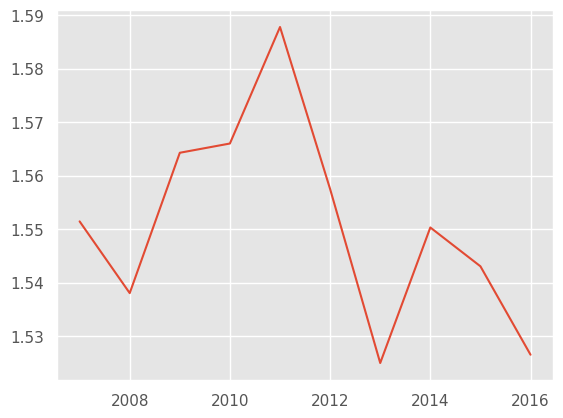

In [ ]:
plt.plot(season_shotavg)

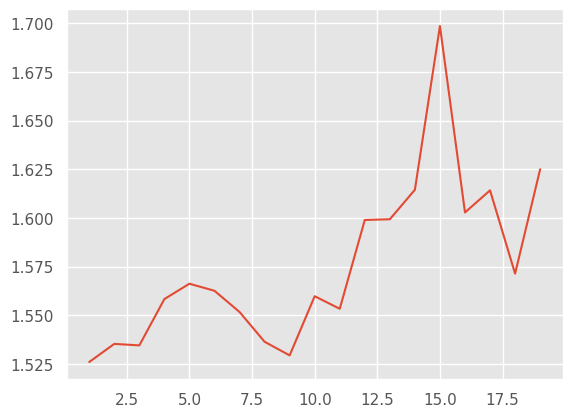

In [ ]:
exp_shotavg = player_freethrows.groupby("exp")["shotsum"].mean()
plt.plot((exp_shotavg.index), exp_shotavg.values)

In [ ]:
def plot_pos_exp_shot(p, to_group):
    pos = player_freethrows[player_freethrows[p] == 1.0]
    exp_shotavg = pos.groupby(to_group)["shotsum"].mean()
    plt.plot(exp_shotavg)

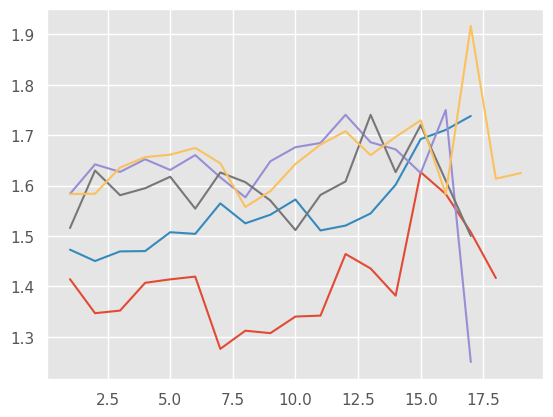

In [ ]:
for p in ["Pos_C","Pos_PF","Pos_PG","Pos_SF","Pos_SG"]:
    pos = player_freethrows[player_freethrows[p] == 1.0]
    exp_shotavg = pos.groupby("exp")["shotsum"].mean()
    plt.plot(exp_shotavg)

In [ ]:
player_freethrows[(player_freethrows["exp"] > 16) & (player_freethrows["Pos_PG"] == 1.0)]

,time,shot_made,1of2,age,player_height,player_weight,exp,FT,FTA,FT%,...,prev_shot1_made_1.0,prev_shot2_made_1.0,Pos_C,Pos_PF,Pos_PG,Pos_SF,Pos_SG,shotsum,prevshotsum,valid_period
57171,337,0,0.0,38.0,193.04,95.254320,17,22.0,28.0,0.786,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0
57172,529,1,1.0,38.0,193.04,95.254320,17,22.0,28.0,0.786,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,1.0
71233,8,1,0.0,39.0,190.50,80.739376,17,22.0,24.0,0.917,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0
71236,64,1,1.0,39.0,190.50,80.739376,17,22.0,24.0,0.917,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,1.0


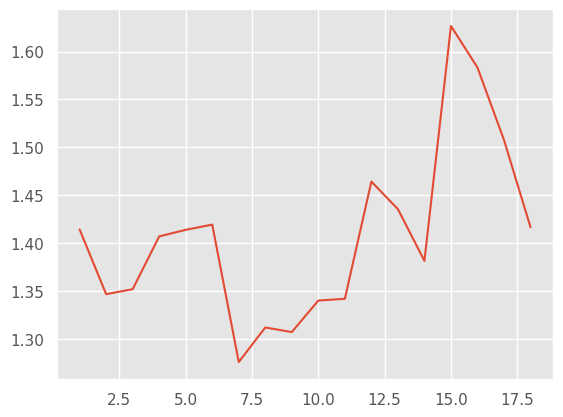

In [ ]:
plot_pos_exp_shot("Pos_C", "exp")

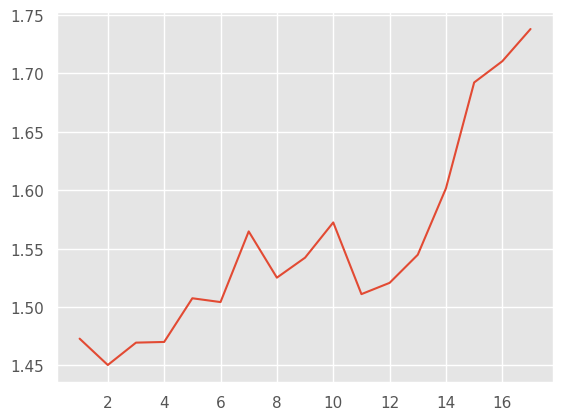

In [ ]:
plot_pos_exp_shot("Pos_PF", "exp")

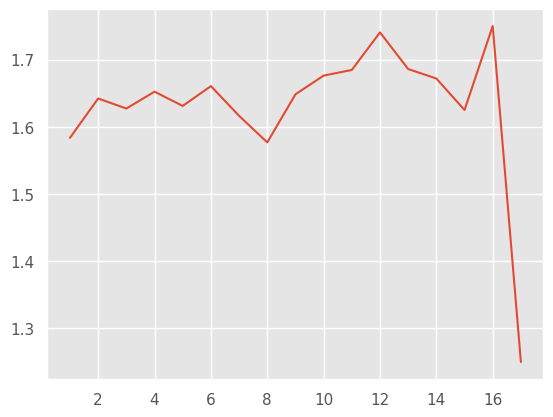

In [ ]:
plot_pos_exp_shot("Pos_PG", "exp")

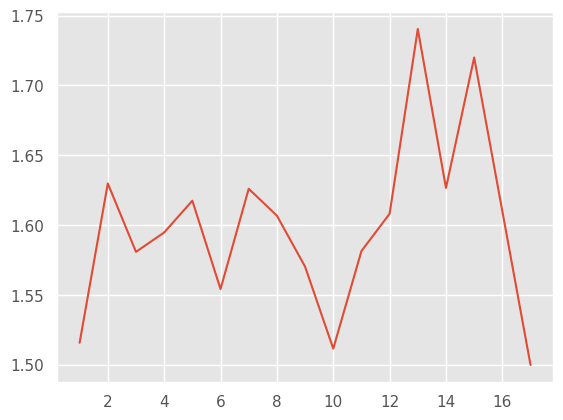

In [ ]:
plot_pos_exp_shot("Pos_SF", "exp")

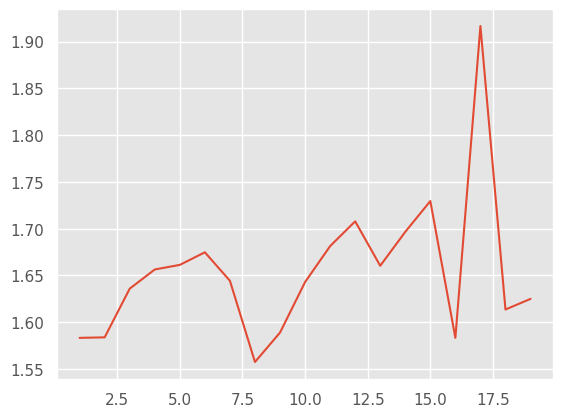

In [ ]:
plot_pos_exp_shot("Pos_SG", "exp")

#C PF, PG, SF SG

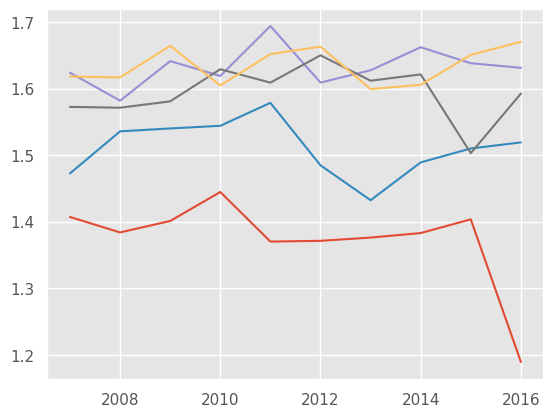

In [ ]:
for p in ["Pos_C","Pos_PF","Pos_PG","Pos_SF","Pos_SG"]:
    pos = player_freethrows[player_freethrows[p] == 1.0]
    exp_shotavg = pos.groupby("season")["shotsum"].mean()
    plt.plot(exp_shotavg)

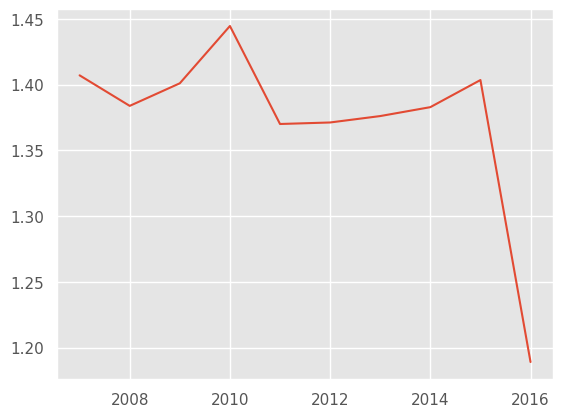

In [ ]:
plot_pos_exp_shot("Pos_C", "season")

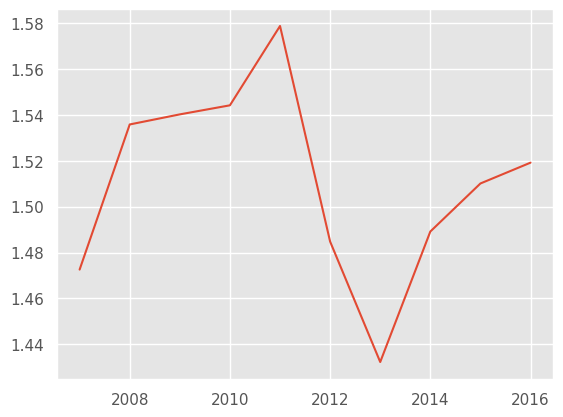

In [ ]:
plot_pos_exp_shot("Pos_PF", "season")

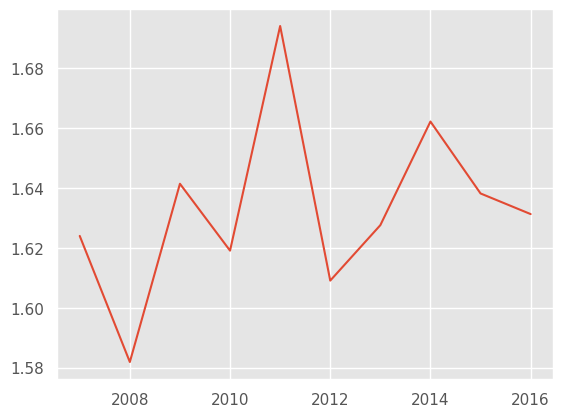

In [ ]:
plot_pos_exp_shot("Pos_PG", "season")

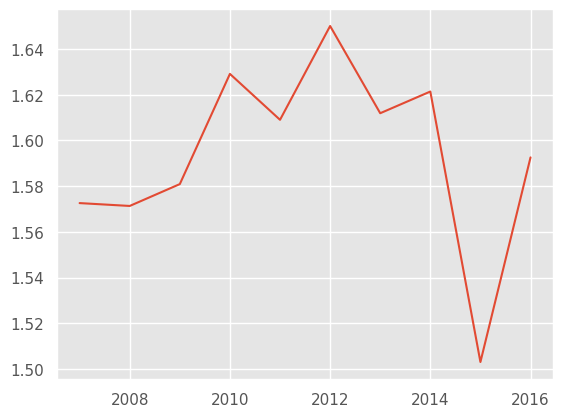

In [ ]:
plot_pos_exp_shot("Pos_SF", "season")

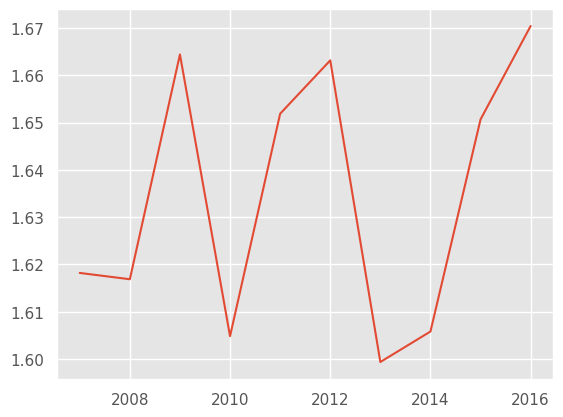

In [ ]:
plot_pos_exp_shot("Pos_SG", "season")

#C , PG, PF SF

# height and weight

In [ ]:
center = player_freethrows[player_freethrows["Pos_C"] == 1.0]
center_height = center[["player_height", "shotsum"]]
center_height

,player_height,shotsum
854,208.28,1.0
857,208.28,2.0
858,208.28,1.0
862,208.28,1.0
863,208.28,2.0
...,...,...
90861,210.82,1.0
90862,210.82,1.0
90968,210.82,1.0
90969,210.82,1.0


In [ ]:
import statsmodels.api as sm

In [ ]:
for p in ["Pos_C","Pos_PF","Pos_PG","Pos_SF","Pos_SG"]:
    pos = player_freethrows[player_freethrows[p] == 1.0]
    pos_height = pos[["player_height", "shotsum"]]
    pos_height

    X = pos_height[["player_height"]]
    y = pos_height["shotsum"]

    X = sm.add_constant(X)

    model = sm.OLS(y, X).fit()
    print(p)
    print(model.summary())
    print()



Pos_C
                            OLS Regression Results                            
Dep. Variable:                shotsum   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     14.19
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           0.000166
Time:                        07:38:49   Log-Likelihood:                -9602.6
No. Observations:                9265   AIC:                         1.921e+04
Df Residuals:                    9263   BIC:                         1.922e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.5843      0.520     

In [ ]:
plt.scatter(center_height["player_height"] + np.random.uniform(-0.05, 0.05, X.shape[0]), y + np.random.uniform(-0.1, 0.1, len(y)), alpha = 0.7)

ValueError: ignored

In [ ]:
for p in ["Pos_C","Pos_PF","Pos_PG","Pos_SF","Pos_SG"]:
    pos = player_freethrows[player_freethrows[p] == 1.0]
    pos_weight = pos[["player_weight", "shotsum"]]
    pos_weight

    X = pos_weight[["player_weight"]]
    y = pos_weight["shotsum"]

    X = sm.add_constant(X)

    model = sm.OLS(y, X).fit()
    print(p)
    print(model.summary())
    print()

In [ ]:
#reverse one hot encode
player_freethrows["Position"] = player_freethrows[["Pos_C","Pos_PF","Pos_PG","Pos_SF","Pos_SG"]].idxmax(axis=1)
player_freethrows

<ipython-input-47-2021a679337c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_freethrows["Position"] = player_freethrows[["Pos_C","Pos_PF","Pos_PG","Pos_SF","Pos_SG"]].idxmax(axis=1)


,time,shot_made,1of2,age,player_height,player_weight,exp,FT,FTA,FT%,...,Pos_PF,Pos_PG,Pos_SF,Pos_SG,shotsum,prevshotsum,valid_period,normalized_height,normalized_weight,Position
1,557,1,1.0,26.0,208.28,104.326160,7,216.0,313.0,0.690,...,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.802943,0.173685,Pos_PF
2,180,1,1.0,26.0,208.28,104.326160,7,216.0,313.0,0.690,...,1.0,0.0,0.0,0.0,2.0,2.0,1.0,0.802943,0.173685,Pos_PF
3,716,0,1.0,26.0,208.28,104.326160,7,216.0,313.0,0.690,...,1.0,0.0,0.0,0.0,1.0,2.0,1.0,0.802943,0.173685,Pos_PF
12,230,0,0.0,26.0,208.28,104.326160,7,216.0,313.0,0.690,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.802943,0.173685,Pos_PF
13,637,1,1.0,26.0,208.28,104.326160,7,216.0,313.0,0.690,...,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.802943,0.173685,Pos_PF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90966,31,0,1.0,26.0,205.74,102.058200,5,39.0,50.0,0.780,...,0.0,0.0,1.0,0.0,1.0,2.0,1.0,0.502222,-0.019146,Pos_SF
90967,82,1,1.0,26.0,205.74,102.058200,5,39.0,50.0,0.780,...,0.0,0.0,1.0,0.0,2.0,1.0,1.0,0.502222,-0.019146,Pos_SF
90968,258,1,0.0,32.0,210.82,121.109064,11,33.0,45.0,0.733,...,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.103664,1.600637,Pos_C
90969,88,1,0.0,32.0,210.82,121.109064,11,33.0,45.0,0.733,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.103664,1.600637,Pos_C


In [ ]:
# normalize height and weight
player_freethrows["normalized_height"] = (player_freethrows["player_height"] - \
                                          player_freethrows["player_height"].mean()) / player_freethrows["player_height"].std()
player_freethrows["normalized_weight"] = (player_freethrows["player_weight"] - \
                                          player_freethrows["player_weight"].mean()) / player_freethrows["player_weight"].std()

with pm.Model() as model:
    alpha = pm.Normal('alpha', mu = 0, sigma = 10)
    beta_experience = pm.Normal("beta_experience", mu = 0, sigma = 10)
    beta_weight = pm.Normal("beta_weight", mu = 0, sigma = 10)
    beta_height = pm.Normal("beta_height", mu = 0, sigma = 10)
    beta_pos = pm.Normal("beta_pos", mu = 0, sigma = 10, shape=5)

    player_freethrows["position_code"] = pd.Categorical(player_freethrows["Position"]).codes

    theta = alpha + beta_experience * player_freethrows["exp"] + \
              beta_weight * player_freethrows["normalized_weight"] + \
              beta_height * player_freethrows["normalized_height"] + \
              beta_pos[player_freethrows["position_code"]]


    # likelihood
    p = pm.Deterministic('p', 1/(1+np.exp(-theta)))
    y_obs = pm.Binomial('y_obs', n = 2, p=p, observed = player_freethrows["shotsum"])

    trace = pm.sample(100, tune=100, target_accept=0.95, chains=1)
summary = pm.summary(trace)
print(summary)

<ipython-input-52-1864cc5b0b97>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_freethrows["normalized_height"] = (player_freethrows["player_height"] - \
<ipython-input-52-1864cc5b0b97>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_freethrows["normalized_weight"] = (player_freethrows["player_weight"] - \
<ipython-input-52-1864cc5b0b97>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

Shape validation failed: input_shape: (1, 100), minimum_shape: (chains=2, draws=4)


                  mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha           -0.291  0.544  -1.084    0.729      0.194    0.142       8.0   
beta_experience  0.016  0.002   0.012    0.019      0.000    0.000     138.0   
beta_weight     -0.137  0.015  -0.166   -0.110      0.002    0.002      51.0   
beta_height      0.150  0.021   0.113    0.187      0.003    0.002      61.0   
beta_pos[0]      0.980  0.541  -0.034    1.764      0.195    0.143       8.0   
...                ...    ...     ...      ...        ...      ...       ...   
p[51129]         0.805  0.004   0.799    0.811      0.000    0.000     150.0   
p[51130]         0.805  0.004   0.799    0.811      0.000    0.000     150.0   
p[51131]         0.693  0.004   0.684    0.700      0.000    0.000      99.0   
p[51132]         0.693  0.004   0.684    0.700      0.000    0.000      99.0   
p[51133]         0.693  0.004   0.684    0.700      0.000    0.000      99.0   

                 ess_tail  r_hat  
alph

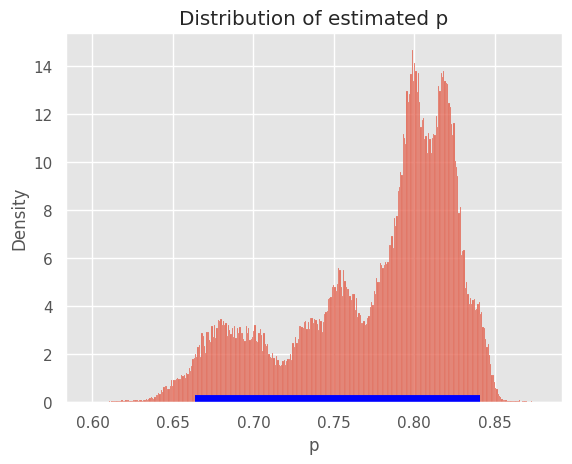

In [ ]:
trunc_p = trace['posterior']['p'].values.reshape(1, -1)[0][0:10000000]
sns.histplot(trunc_p, stat='density');
plt.title(r"Distribution of estimated p");
plt.xlabel(r"p");
plt.hlines(0, np.percentile(trunc_p, 2.5), np.percentile(trunc_p, 97.5), colors='blue', linewidth=10)

In [ ]:
np.mean(trunc_p)

0.7759285953359143

In [ ]:
np.percentile(trunc_p, 2.5)

0.6639018820318392

In [ ]:
np.percentile(trunc_p, 97.5)

0.8406279921885151

In [ ]:
np.median(trunc_p)

0.7937172896552032

In [ ]:
np.std(trunc_p)

0.05046924227363785